# Pandas Practice 3 (Bike Share Data)

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Helpful Python Code Snippets for Data Exploration in Pandas](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [Manipulating tabular data with Pandas](https://neuroimaging-data-science.org/content/004-scipy/002-pandas.html)


**By the end of this session you should be able to**
- Explore data with Pandas to answer conceptual questions
- Write chained commands for efficient one-liners



In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('data/bike_share_201402_trip_data.csv')

How many observations are there?

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Trip ID            144015 non-null  int64 
 1   Duration           144015 non-null  int64 
 2   Start Date         144015 non-null  object
 3   Start Station      144015 non-null  object
 4   Start Terminal     144015 non-null  int64 
 5   End Date           144015 non-null  object
 6   End Station        144015 non-null  object
 7   End Terminal       144015 non-null  int64 
 8   Bike #             144015 non-null  int64 
 9   Subscription Type  144015 non-null  object
 10  Zip Code           137885 non-null  object
dtypes: int64(5), object(6)
memory usage: 12.1+ MB


Change the columns to be pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [93]:
cols = df.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
cols = [col.replace('#', 'num') for col in cols]
df.columns = cols
df

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
...,...,...,...,...,...,...,...,...,...,...,...
144010,198771,385,2/28/2014 22:15,Powell Street BART,39,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404
144011,198772,145,2/28/2014 22:38,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111
144012,198773,677,2/28/2014 22:45,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102
144013,198774,64128,2/28/2014 23:01,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124


How many types of subscription options are there? What are the different subscription types?

In [94]:
print(df['Subscription_Type'].unique())

['Subscriber' 'Customer']


What is the frequency of each subscription option?

In [95]:
df['Subscription_Type'].value_counts()

Subscription_Type
Subscriber    113647
Customer       30368
Name: count, dtype: int64

Please plot the frequency of each subscription option with a pie chart:

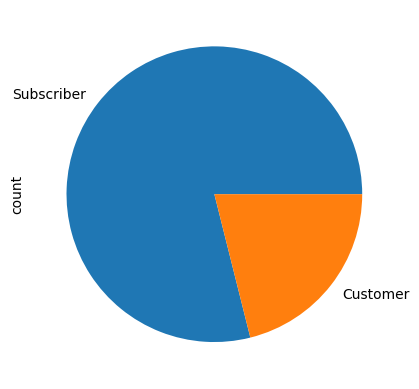

In [96]:
df['Subscription_Type'].value_counts().plot(kind='pie');

Please plot the frequency of each subscription option with a bar chart:

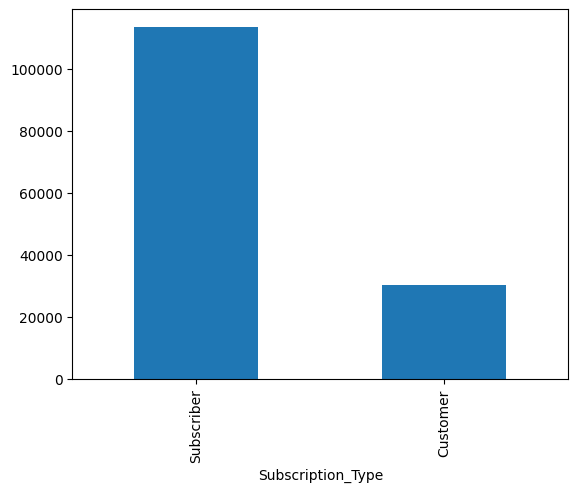

In [97]:
df['Subscription_Type'].value_counts().plot(kind='bar');

Have a look at the start_station column: Which 10 stations occur most frequently?

In [98]:
df_start = df.groupby('Start_Station').count()
df_start.sort_values('Trip_ID', ascending=False).head(10)

,Trip_ID,Duration,Start_Date,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
Start_Station,,,,,,,,,,
San Francisco Caltrain (Townsend at 4th),9838,9838,9838,9838,9838,9838,9838,9838,9838,9677
Harry Bridges Plaza (Ferry Building),7343,7343,7343,7343,7343,7343,7343,7343,7343,6766
Embarcadero at Sansome,6545,6545,6545,6545,6545,6545,6545,6545,6545,5826
Market at Sansome,5922,5922,5922,5922,5922,5922,5922,5922,5922,5742
Temporary Transbay Terminal (Howard at Beale),5113,5113,5113,5113,5113,5113,5113,5113,5113,5021
Market at 4th,5030,5030,5030,5030,5030,5030,5030,5030,5030,4691
2nd at Townsend,4987,4987,4987,4987,4987,4987,4987,4987,4987,4827
San Francisco Caltrain 2 (330 Townsend),4976,4976,4976,4976,4976,4976,4976,4976,4976,4899
Steuart at Market,4913,4913,4913,4913,4913,4913,4913,4913,4913,4686


Now look at the end_station column: Which 10 stations occur the least often?

In [99]:
df_end = df.groupby('End_Station').count()
df_end.sort_values('Trip_ID', ascending=True).head(10)

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Terminal,Bike_num,Subscription_Type,Zip_Code
End_Station,,,,,,,,,,
Mezes Park,5,5,5,5,5,5,5,5,5,5
San Jose Government Center,23,23,23,23,23,23,23,23,23,22
Broadway at Main,56,56,56,56,56,56,56,56,56,54
Franklin at Maple,93,93,93,93,93,93,93,93,93,90
San Antonio Shopping Center,93,93,93,93,93,93,93,93,93,91
San Mateo County Center,106,106,106,106,106,106,106,106,106,105
Redwood City Public Library,117,117,117,117,117,117,117,117,117,113
Castro Street and El Camino Real,129,129,129,129,129,129,129,129,129,129
Redwood City Medical Center,178,178,178,178,178,178,178,178,178,178


Create a table that has start_station segmented by subscription_type and include also the row/column margins (subtotals). If you are not sure how to do it, check out the documentation for `pd.crosstab()`.

In [100]:
table = pd.crosstab(
    index=df["Start_Station"],
    columns=df["Subscription_Type"],
    margins=True,
    margins_name="Total"
)

table

Subscription_Type,Customer,Subscriber,Total
Start_Station,,,
2nd at Folsom,427,3349,3776
2nd at South Park,535,3923,4458
2nd at Townsend,882,4105,4987
5th at Howard,606,2029,2635
Adobe on Almaden,75,260,335
...,...,...,...
Townsend at 7th,518,3975,4493
University and Emerson,328,106,434
Washington at Kearney,561,911,1472


Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

In [101]:
print(df['Duration'].min())
print(df[df['Duration'] == df['Duration'].min()]['Duration'].count())

60
17


What do you think is going on with the short trips?

In [102]:
df[df['Duration'] == df['Duration'].min()]

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
2887,8576,60,9/2/2013 9:40,Harry Bridges Plaza (Ferry Building),50,9/2/2013 9:41,Harry Bridges Plaza (Ferry Building),50,354,Subscriber,94102
2925,8651,60,9/2/2013 10:50,San Francisco Caltrain 2 (330 Townsend),69,9/2/2013 10:51,San Francisco Caltrain 2 (330 Townsend),69,544,Subscriber,94107
3535,9444,60,9/3/2013 8:37,Redwood City Public Library,24,9/3/2013 8:38,Redwood City Public Library,24,239,Subscriber,94105
7296,14644,60,9/8/2013 13:55,San Francisco Caltrain (Townsend at 4th),70,9/8/2013 13:56,San Francisco Caltrain (Townsend at 4th),70,521,Subscriber,95126
10457,18792,60,9/12/2013 10:09,Civic Center BART (7th at Market),72,9/12/2013 10:10,Civic Center BART (7th at Market),72,632,Subscriber,94103
11545,20271,60,9/13/2013 12:43,Market at 4th,76,9/13/2013 12:44,Market at 4th,76,500,Subscriber,94116
13437,22689,60,9/15/2013 21:15,Embarcadero at Sansome,60,9/15/2013 21:16,Embarcadero at Sansome,60,577,Subscriber,94111
20568,32159,60,9/23/2013 18:53,Townsend at 7th,65,9/23/2013 18:54,Townsend at 7th,65,566,Subscriber,94107
40000,57581,60,10/14/2013 14:47,Clay at Battery,41,10/14/2013 14:48,Clay at Battery,41,368,Subscriber,94158
55127,77650,60,10/30/2013 18:22,Harry Bridges Plaza (Ferry Building),50,10/30/2013 18:23,Harry Bridges Plaza (Ferry Building),50,416,Subscriber,94110


Short trips have the same start and end stations, so the actual trip didn't happen

What is the longest trip?

In [103]:
print(df['Duration'].max())
df[df['Duration'] == df['Duration'].max()]

722236


,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code
80510,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301


How would you define a "long" trip? How many trips are "long" according to your definition?

In [104]:
df['Duration_hrs'] = df['Duration'] / 3600
print(df['Duration_hrs'].describe())
df_long_trips = df[df['Duration_hrs'] > df['Duration_hrs'].quantile(0.95)]
df_long_trips.shape

count    144015.000000
mean          0.341919
std           1.848045
min           0.016667
25%           0.096944
50%           0.147500
75%           0.221389
max         200.621111
Name: Duration_hrs, dtype: float64


(7201, 12)

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

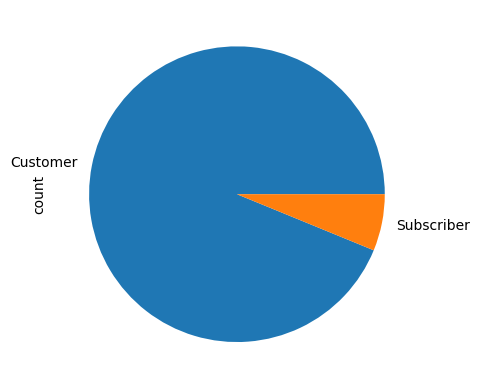

In [105]:
df_long_trips['Subscription_Type'].value_counts().plot(kind='pie');

Long trips are made mostly by non-subscribers, probably problems with bike return

Plot the duration column.

<Axes: >

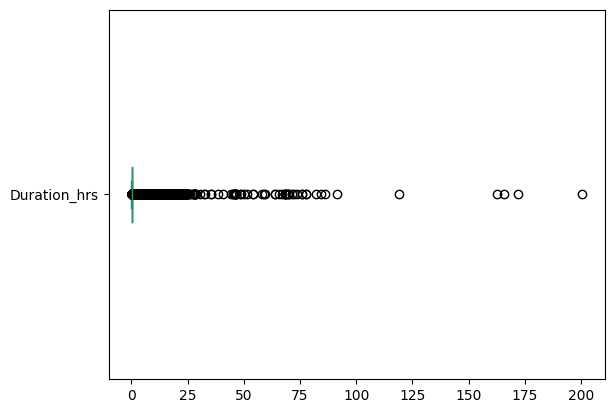

In [106]:
df['Duration_hrs'].plot(kind='box', vert=False)

Does this plot give any insights?

Select subsections of the data to make plots that provide more insights.

<Axes: ylabel='Frequency'>

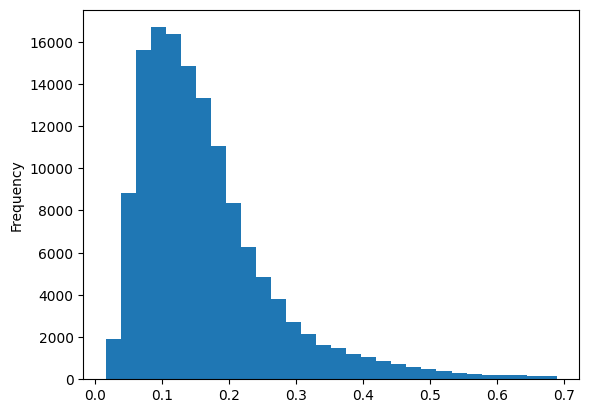

In [107]:
df_norm_trips = df[df['Duration_hrs'] <= df['Duration_hrs'].quantile(0.95)]
df_norm_trips['Duration_hrs'].plot(kind='hist', bins=30)

The Product Team would like all of the station names to be lower case and  with `_` as a separator

`South Van Ness at Market` -> `south_van_ness_at_market`  

**DO NOT USE A FOR LOOP. THEY ARE THE 👿**

In [108]:
def fix_name(s):
    s = s.lower()
    s = s.replace(' ', '_')
    return s

df['Start_Station'] = df['Start_Station'].map(fix_name)
df['End_Station'] = df['End_Station'].map(fix_name)
df.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_num,Subscription_Type,Zip_Code,Duration_hrs
0,4576,63,8/29/2013 14:13,south_van_ness_at_market,66,8/29/2013 14:14,south_van_ness_at_market,66,520,Subscriber,94127,0.017500
1,4607,70,8/29/2013 14:42,san_jose_city_hall,10,8/29/2013 14:43,san_jose_city_hall,10,661,Subscriber,95138,0.019444
2,4130,71,8/29/2013 10:16,mountain_view_city_hall,27,8/29/2013 10:17,mountain_view_city_hall,27,48,Subscriber,97214,0.019722
3,4251,77,8/29/2013 11:29,san_jose_city_hall,10,8/29/2013 11:30,san_jose_city_hall,10,26,Subscriber,95060,0.021389
4,4299,83,8/29/2013 12:02,south_van_ness_at_market,66,8/29/2013 12:04,market_at_10th,67,319,Subscriber,94103,0.023056


Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…
> Time boxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 